In [70]:
#from tangostationcontrol.statistics_writer.statistics_writer import main
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
from os import listdir
from os.path import isfile,join
from time import sleep

In [71]:

import gc
def loadXST(fn0,sis):
    D2=[]
    with h5py.File(fn0[:], 'r') as f:
      for s in f.keys():
        try:
         D=np.array(f[s]['values'])
         D2.append(D[:,sis][sis])
        except:
            continue;
    D2=np.array(D2)
    return D2


In [75]:
dhours=[]
dcnt=[]
opath='xst2_c10bm'
fpath='xst2_c10b'
if True:
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f))]
    print(len(files))
    for fn in files:
        ext=fn.split('.')[-1]
#    if ext!='h5': continue;
        s=fn.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        fhour=ftime[:-3]
       # print(band,ftime,fhour)
        if fhour in dhours: 
            dcnt[dhours.index(fhour)]+=1;
        else:
            dhours.append(fhour)
            dcnt.append(1)
print(dhours,dcnt)

9216
['2022-08-26-19', '2022-08-26-20', '2022-08-26-21', '2022-08-26-22', '2022-08-26-23', '2022-08-27-00', '2022-08-27-01', '2022-08-27-02', '2022-08-27-03', '2022-08-27-04', '2022-08-27-05', '2022-08-27-06', '2022-08-27-07', '2022-08-27-08', '2022-08-27-09', '2022-08-27-10', '2022-08-27-11', '2022-08-27-12'] [512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512]


In [76]:
sis=[i for i in range(18)]
nsi=len(sis)

for ic,shour in enumerate(dhours):
    if dcnt[ic]!=512: continue;
    day=int(shour[8:8+2])
    hour=int(shour[11:11+2])
#    if day<24: continue;
#    if hour<12: continue;
    print(shour,day,hour)
#    continue;
    xst=np.zeros([512,nsi,nsi],dtype='complex')
    cnt=np.zeros([512],dtype='int')
    for fn in files:
        ext=fn.split('.')[-1]
        s=fn.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        fhour=ftime[:-3]
        if fhour!=shour: continue;
        D=loadXST(fpath+"/"+fn,sis);
        cnt[band]+=D.shape[0];
        xst[band]+=D.sum(axis=0);
    xst/=cnt[:,np.newaxis,np.newaxis];
    np.savez(opath+"/xst_mean_"+shour,xst=xst,cnt=cnt)


2022-08-26-19 26 19
2022-08-26-20 26 20
2022-08-26-21 26 21
2022-08-26-22 26 22
2022-08-26-23 26 23
2022-08-27-00 27 0
2022-08-27-01 27 1
2022-08-27-02 27 2
2022-08-27-03 27 3
2022-08-27-04 27 4
2022-08-27-05 27 5
2022-08-27-06 27 6
2022-08-27-07 27 7
2022-08-27-08 27 8
2022-08-27-09 27 9
2022-08-27-10 27 10
2022-08-27-11 27 11
2022-08-27-12 27 12


OSError: Unable to open file (bad object header version number)

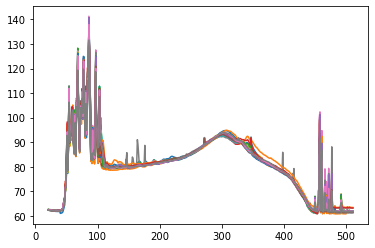

In [45]:
for si in sis:
    plt.plot(10*np.log10(np.abs(xst[:,si,si])))

In [46]:
def LoadFiles(fpath):
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f))]
    print(len(files))
    return
    Data=[]
    Bands=[]
    for f in files:
        ext=f.split('.')[-1]
        if ext!='h5': continue;
        s=f.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        try:
         D=loadXST(join(fpath,f));
         D=np.array(D)
         print("band=",band," time=",ftime," Data size=",D.shape)
         Bands.append(band)
         Data.append(D)
        except:
         print('Can not open',f)
        gc.collect()
    return Bands,Data
